# Lesson 5: Exploring data using pandas

This week,we will learn how to read and explore data files in Python. We will focus on using [pandas](https://pandas.pydata.org/pandas-docs/stable/) which is an open-source package for data analysis in Python. pandas is an excellent toolkit for working with real world data that often have a tabular structure (rows and columns).


---


## General information

### Sources

This lesson is inspired by the [Geo-python module at the University of Helsinki](https://geo-python-site.readthedocs.io/en/latest/course-info/course-info.html) which in turn acknowledges the [Programming in Python lessons](http://swcarpentry.github.io/python-novice-inflammation/) from the [Software Carpentry organization](http://software-carpentry.org). This version was adapted for Colab and a UK context by Ruth Hamilton.

### About this document

This is a [Google Colab Notebook](https://colab.research.google.com/?utm_source=scs-index). This particular notebook is designed to introduce you to a few of the basic concepts of programming in Python. Like other common notebook formats (e.g. [Jupyter](http://jupyterlab.readthedocs.io/en/stable/) ), the contents of this document are divided into cells, which can contain:

*   Markdown-formatted text,
*   Python code, or
*   raw text

You can execute a snippet of code in a cell by pressing **Shift-Enter** or by pressing the **Run Cell** button that appears when your cursor is on the cell .

---

#What is pandas?

Pandas is an open-source software library built on top of Python specifically for **data manipulation and analysis**. In particular, pandas offers **data structures** and **operations** for  powerful, flexible, and easy-to-use data analysis and manipulation. Pandas strengthens Python by giving the popular programming language the capability to work with spreadsheet-like data enabling fast loading, aligning, manipulating, and merging, in addition to other key functions.

#Pandas data structures

We will first get familiar with the **pandas data structures**: *Series* and *DataFrame*:

![pandas data structures](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

- **pandas Series** (a 1-dimensional data structure) is used for storing and manipulating a sequence of values. A pandas Series is kind of like a list, but more clever.
- **pandas DataFrame** (a 2-dimensional data structure) is used for storing and mainpulating table-like data (data with rows and columns) in Python. You can think of a pandas DataFrame as a programmable spreadsheet. One row or one column in a pandas DataFrame is actually a pandas Series.


These pandas structures incorporate a number of things we've already encountered such as:
* indices,
* data stored in a collection, and
* data types.

Let's have another look at some pandas data structures below with some additional annotation.

![pandas data structures](https://geo-python.github.io/site/_images/pandas-structures-annotated.png)

As you can see, both DataFrames and Series in pandas have an **index** that can be used to select values, but they also have **column labels** to identify columns in DataFrames. In the lesson this week we’ll use many of these features to explore real-world data and learn some useful data analysis procedures.

For a comprehensive overview of pandas data structures you can have a look at [Chapter 5 in Wes MacKinney’s book Python for Data Analysis](https://wesmckinney.com/book/pandas-basics.html) (3rd Edition, 2022) and the pandas online documentation about [data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html).

---


> **Note** pandas is a “high-level” package, which means that it makes use of several other packages, such as [NumPy](https://numpy.org/), in the background. There are several ways in which data can be read from a file in Python,  we are focussing primarily on pandas because it is easy-to-use, efficient and intuitive. If you are curious about other approaches for interacting with data files, you can find materials
 about reading data using NumPy or built-in Python functions from other sources online.

---



#First steps with pandas

The first step in data analysis is actually getting the data into the platform you are working in! So our first exercise is going to involve using pandas to read in a data file. In this case, we are going to load a csv file that contains some historical weather data from Sheffield.

## Input data: weather statistics

Our input data is a text file containing weather observations from Sheffield, UK retrieved from the [CEDA Archive](https://catalogue.ceda.ac.uk/uuid/8bcf6925cddc4681b96f94d424537b9e). This is an open dataset, but you need to be a registered user with CEDA. You should have registered with the site last week and can find a copy of the license [at this link](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

- File name: [midas-open_uk-daily-temperature-SY_2020.csv](https://drive.google.com/file/d/1gYjHhdd35K7ZCXQXemDJ34ERapZ33LBD/view?usp=sharing) (have a look at the file before reading it in using pandas!)
- The file is available in the L5 folder in the Shared Google drive and will also be posted on Blackboard.
- The data file contains observed daily temperature observations for Sheffield for 2020.
- There are 732 rows of data in this sample data set.
- The data has been derived from a data file of daily temperature measurments downloaded from the [CEDA Archive](https://catalogue.ceda.ac.uk/uuid/8bcf6925cddc4681b96f94d424537b9e).





## Reading a data file with pandas

Now we're ready to read in our temperature data file. **First, we need to import the pandas module.** It is customary to import pandas as `pd`, this means that when we want to use a method from the pandas module, we can shorten the statement to `pd.Method()` rather than `pandas.Method)`.

In [ ]:
import pandas as pd

Now, mount your Google Drive so we can access the data in the Shared Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Next, we'll read the input data file**. We will use the `pandas.read_csv()` function to read in the contents of the data file and store it in a *variable* called `data`.


> Becasue we are using a Shared Drive, the file path should be the same for everyone. If you want to read a file in your own drive, you can right-click on file name and choose to *Copy Path*



In [ ]:
# Read the file using pandas
data = pd.read_csv("/content/drive/Shareddrives/TRP479_Spatial_Data_science_2024/L5/midas-open_uk-daily-temperature-SY_2020.csv")

---


> **Delimiter and other optional parameters**
>
> Our input file is a comma-delimited file; columns in the data are separted by commas (`,`) on each row. The pandas `.read_csv()` function has the comma as the default delimiter so we don't need to specify it separately. In order to make the delimiter visible also in the code for reading the file, could add the `sep` parameter:

```
data = pd.read_csv('..../midas-open_uk-daily-temperature-SY_2020.csv', sep=`,`)
```


>The `sep` parameter can be used to specify whether the input data uses some other character, such as `;` as a delimiter. For a full list of available parameters, please refer to the [pandas documentation for pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), or run `help(pd.read_csv)`.

---

---

>**Reading different file formats**
>
>`pandas.read_csv()` is a general function for reading data files separated by commas, spaces, or other common separators.
>
>pandas has several different functions for parsing input data from different formats. There is, for example, a separate function for reading Excel files `read_excel`. Another useful function is `read_pickle` for reading data stored in the [Python pickle format](https://docs.python.org/3/library/pickle.html). Check out the [pandas documentation about input and output functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-tools-text-csv-hdf5) and Chapter 6 in [MacKinney (2022): Python for Data Analysis](https://wesmckinney.com/book/accessing-data.html) for more details about reading data.

---

If all goes as planned, you should now have a new variable `data` in memory that contains the input data.

Let's check the the contents of this variable by calling `data` or `print(data)`:

In [ ]:
data

We have some data and it has a structure, but there are some strange values present such as `NaN`, and the first lines of the dataframe look a bit weird. `NaN` stands for "not a number", and might indicate some problem with reading in the contents of the file.

Plus, we expected about 732 lines of data, but the index values go up to 823 when we print the contents of the `data` variable. Looks like we need to investigate this further.

You should have noted that there are some metadata at the top of the file giving basic information about its contents and source ([midas-open_uk-daily-temperature-SY_2020.csv](https://drive.google.com/file/d/1gYjHhdd35K7ZCXQXemDJ34ERapZ33LBD/view?usp=sharing)). This isn't data we want to process, so we need to skip over that part of the file when we load it.

In this case, the first **91** rows contain metadata like this:

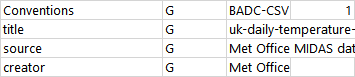




Fortunately, skipping over rows is easy to do when reading in data using pandas. We just need to add the `skiprows` parameter when we read the file, listing the number of rows to skip (91 in this case).
>We could, of course, delete the metadata from the csv file - but this is not a good idea, the metadata usually contains information we need to interpret the data.

Let's try reading the datafile again, and this time defining the `skiprows` parameter.

In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/TRP479_Spatial_Data_Science_Data/L5/midas-open_uk-daily-temperature-SY_2020.csv",skiprows=91)

Let's now print the dataframe and see what changed:

In [ ]:
print(data)


After reading in the data, it is always good to check that everything went well by printing out the data as we did here. However, often it is enough to have a look at the top few rows of the data.

We can use the `.head()` function of the pandas DataFrame object to quickly check the top rows. By default, the `.head()` function returns the first 5 rows of the DataFrame:

In [ ]:
data.head()

We can also check the last rows of the data using `data.tail()`:

In [ ]:
data.tail()

> **Note** The last row of our data looks a bit odd. The downloaded dataset uses a 'flag' to indicate where the data starts and finishes. In this case the term 'data' appears in the line before the data starts and 'end data' to indicate the last line. This can be useful if you are reading in files of different sizes and with different amounts of metadata. We don't want to include that last line in our dataset; but before we work out how to remove it, we'll do a bit more exploring.





>**Note** that pandas DataFrames have **labelled axes (rows and columns)**. In our sample data, the rows labeled with an index value (`0` to `732`), and columns labelled `on_end_time`, `id_type`, `id`, etc. Later on, we will learn how to use these labels for selecting and updating subsets of the data.


**Let's also confirm the data type of our data variable:**

In [ ]:
type(data)

No surprises here, our data variable is a pandas DataFrame.



---


#### Reading subsets of a file

This time, we are going to read in the file `midas-open_uk-daily-temperature-SY_2020.csv` again and store its contents in a new variable called `temp_data`. In this case, we only want to read in the columns `ob_end_time` and `id_type`. You can achieve this using an additional paramter, `usecols`, when reading in the file. For example, the parameter `..., skiprows=91,usecols[0,1])` would read *only* the first two columns. Feel free to check for more help in the [pandas.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [ ]:
# Complete the line below to read in the data file again BUT  only the first two columns ('ob_end_time' and 'id_type')
temp_data = pd.read_csv(

In [ ]:
#@title Click here to see code
temp_data = pd.read_csv("/content/drive/Shareddrives/TRP479_Spatial_Data_Science_Data/L5/midas-open_uk-daily-temperature-SY_2020.csv",skiprows=91,usecols=[0,1])

Now check that is read in only the first two columns:

In [ ]:
# Check the contents of the first rows of the data file
temp_data.head()

In [ ]:
#@title Click here to see code
# Check the contents of the first rows of the data file
temp_data.head()



---


## DataFrame properties

Let's continue with the full data set that we have stored in the variable `data` and explore it's contents further.
A normal first step when you load new data is to explore the dataset a bit to understand how the data is structured, and what kind of values are stored in there.

Let's start by checking the size of our data frame. We can use the `len()` function similar to the one we use with lists to check how many rows we have:

In [ ]:
# Check the number of rows
len(data)

We can also get a quick sense of the size of the dataset using the `shape` attribute.


In [ ]:
# Check dataframe shape (number of rows, number of columns)
data.shape

Here we see that our dataset has 732 rows and 22 columns, just as we saw above when printing out the entire DataFrame.


>**Note** `shape` is one of the several [attributes related to a pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data).

**We can also check the column names we have in our DataFrame.** We already saw the column names when we checked the 5 first rows using `data.head()`, but often it is useful to access the column names directly. You can check the column names by calling `data.columns` (returns an index object that contains the column labels) or `data.columns.values` (returns an numpy array object that contains the column labels) :

In [ ]:
# Print column names
data.columns

#data.columns.values
data.columns.values


We can also find information about the row identifiers using the `index` attribute:

In [ ]:
# Print index
data.index


Here we see how the data is indexed, starting at 0, ending at 731, and with an increment of 1 between each value. This is basically the same way in which Python lists are indexed, however, pandas also allows other ways of identifying the rows. DataFrame indices could, for example, be character strings, or date objects. We will learn more about resetting the index later.

What about the data types of each column in our DataFrame? We can check the data type of all columns at once using `pandas.DataFrame.dtypes`:

In [ ]:
# Print data types
data.dtypes

Here we see that the data types in our columns are a mix of `object` and `float64` (decimal values with 64-bit precision).



---


#### Check your understanding

See if you can find a way to print out the number of columns in our DataFrame.

In [ ]:
#find the number of columns in the 'data' dataframe:


In [ ]:
#@title Click here to see one solution
# Here is one solution
len(data.columns)



---


### Selecting columns

We can select specific columns based on the column lables. The basic syntax is `dataframe[label]`, where `label` can be a single column name, or a list of column names. Let's start by selecting two columns, `'ob_end_time'` and `'max_air_temp'`. Becasue we want **2** columns, we need to place them in a list first, suing the syntax `["ob_end_time", "max_air_temp"]`.

In [ ]:
selection = data[["ob_end_time", "max_air_temp"]]

In [ ]:
selection

Let's also check the data type of this selection:

In [ ]:
type(selection)

The subset is still a pandas DataFrame, and we are able to use all the methods and attributes related to a pandas DataFrame also with this subset. For example, we can check the shape:

In [ ]:
selection.shape

We can also access a single column of the data based on the column name:

In [ ]:
selection["max_air_temp"]

What about the type of the column itself?

In [ ]:
# Check datatype of the column
type(selection["max_air_temp"])

---

>**Each column (and each row) in a pandas data frame is actually a pandas Series** - a 1 dimensional data structure!

---

---
**Note**
>You can also retreive a column using a different syntax:
 >   
>```
data.TEMP
```
>
>This syntax works only if the column name is a valid name for a Python variable (e.g. the column name should not contain whitespace).
The syntax `data["column"]` works for all kinds of column names, so we recommend using this approach.

---

### Dropping data from a dataframe
For now, let's go back to that last row of data; we would  like to remove the last row becasue it doesn't contain valid data.

We can do that using the `.drop()` method on the DataFrame. [This method](https://www.w3schools.com/python/pandas/ref_df_drop.asp) can remove a specified row or column (or multiple rows or columns).

By specifying the `axis` parameter, we can specify if we want to 'drop' a column  (`axis='columns'`) or a row (`axis='index'`). The parameter `inplace = True` removes the column or row from the current dataframe and is the default, aetting the `inplace` parameter to `False` returns a *copy* of the dataframe with the column or row removed.

In [ ]:
#look at the last rows of the data frame
data.tail()

In [ ]:
# 'drop' the last row of data in our data frame
data.drop(len(data)-1,axis = 'index',inplace =True)

> **Note** Here, rather than specify the row we want to drop by its index number, we use the `len()` function to calculate the *length* of the data (and subtract 1 to account for zero-based indexing).

In [ ]:
#check the last rows of the data frame; it should end with two values for the 31/12/2020
data.tail()



---


## Descriptive statistics

pandas DataFrames and Series contain useful methods for getting summary statistics. Available methods include `mean()`, `median()`, `min()`, `max()`, and `std()` (the standard deviation).

We could, for example, check the mean temperature in our input data. We check the mean for a single column (*Series*):

In [ ]:
# Check mean value of a column
data["max_air_temp"].mean()

and for all columns (in the *DataFrame*):

In [ ]:
# Check mean value for all columns
data.mean()

For an overview of the basic statistics for all attributes in the data, we can use the `describe()` method:


In [ ]:
# Get descriptive statistics
data.describe()

#### Check your understanding

It doesn't make much sense to print out descriptive statistics for some of our  columns (`'src_id'` is the identifying code for the Sheffiled weather station and is the same for all entires). You'll also note some of the columns (`'ob_end_time'`, for example) are not listed. This is beacsue they are **datetime** objects, which we will learn about later.

See if you can print out the descriptive statistics again, this time only for columns `'max_air_temp'` and `'min_air_temp'` (**Tip:** go back to the section on Selecting Columns if you are not sure):

In [ ]:
# Get descriptive statistics for selected columns


In [ ]:
#@title Click to show code:
data[["max_air_temp", "min_air_temp"]].describe()



---


## Extra: Very basic plots

Visualizing the data is a key part of data exploration, and pandas comes with a handful of plotting methods, which all rely on the [Matplotlib](https://matplotlib.org/) plotting library.

For very basic plots, we don’t need to import Matplotlib separately. We can already create very simple plots using the `DataFrame.plot` method.

> **NOTE** You may also have noticed the 'Suggest Charts' button next to dataFrame outputs. These are a useful short cut to view charts associated with the dataFrame data and also provide the underlying code snippet. **However, it is important to also understand how the plots are created and the underlying code so that you can control the contents and structure of the plots.**
You may also find that the 'suggested' plots are not always meaningful - thinking critically about what you choose to plot is important!

Let's plot all the columns that contain values related to temperatures:

In [ ]:
data[["max_air_temp", "min_air_temp"]].plot()

Now you might want to start modifying the plot by adding axis labels, color settings and other formatting. We will learn all this later!

## Extra: From lists to pandas objects

Most often we create pandas objects by reading in data from an external source, such as a text file. Here, we will briefly see how you can create pandas objects from Python lists. If you have long lists of numbers, for instance, creating a pandas Series will allow you to interact with these values more efficiently in terms of computing time.

In [ ]:
# Create pandas Series from a list
number_series = pd.Series([ 4, 5, 6, 7.0])
print(number_series)

Note that pandas is smart about the conversion, detecting a single floating point value (`7.0`) and assigning all values in the Series the data type `float64`.

If needed, you can also set a custom index when creating the object:

In [ ]:
number_series = pd.Series([ 4, 5, 6, 7.0], index=['a','b','c','d'])
print(number_series)

In [ ]:
type(number_series)

How about combining several lists as a DataFrame? Let's take a subset of the lists we used in Exercise 2 (L2) and see how we could combine those as a pandas DataFrame:

In [ ]:
# Station names
stations = ['Braemar','Dunstaffnage','Eskdalemuir','Leuchars','Nairn','Newton Rigg','Paisley','Wick Airport']

# Latitude coordinates of Weather stations
lats = [57.01,56.45,55.31,56.38,57.59,54.67,55.85,58.45]

# Longitude coordinates of Weather stations
lons = [-3.40,-5.44,-3.21,-2.86,-3.82,-2.79,-4.43,-3.09]

Often we indeed create pandas DataFrames by reading in data (e.g. using `pd.read_csv(filename.csv)`), but sometimes you might also combine lists into a DataFrame inside the script using the `pandas.DataFrame` constructor. Here, we are using a *Python dictionary* `{"column_1": list_1, "column_2": list_2, ...}` to indicate the structure of our data.

In [ ]:
new_data = pd.DataFrame(data = {"station_name" : stations, "lat" : lats, "lon" : lons})
new_data

In [ ]:
type(new_data)

In the previous example, we created a data frame from existing lists. Often, however, you might want to start working with an **empty** data frame instead:

In [ ]:
df = pd.DataFrame()

In [ ]:
print(df)

Check more details about available paramenters and methods from [the pandas.DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas-dataframe).

## Extra: Interactive tables:
You may have noticed a little 'table' icon when you output a pandas dataframe, this opens your dataframe as an [interactive table](
https://colab.research.google.com/notebooks/data_table.ipynb). This allows you  filter, sort, and explore  your data dynamically.

Experiment with this feature with the `new_data` dataset and answer the questions below.

In [ ]:
#convert 'new_data' to an interactive table
new_data




*   Which is the most *northerly* weather station?
*   Which is the most *westerly* weather station?
* Filter the `new_data` to show only the weather stations with a latitude between 55 and 57

